In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

# Chargement

In [2]:
# Charger les données depuis le fichier CSV
file_path = '/content/Données clients - Feuille 1_nettoyées.csv'
data = pd.read_csv(file_path)

# Distribution de la durée des voyages

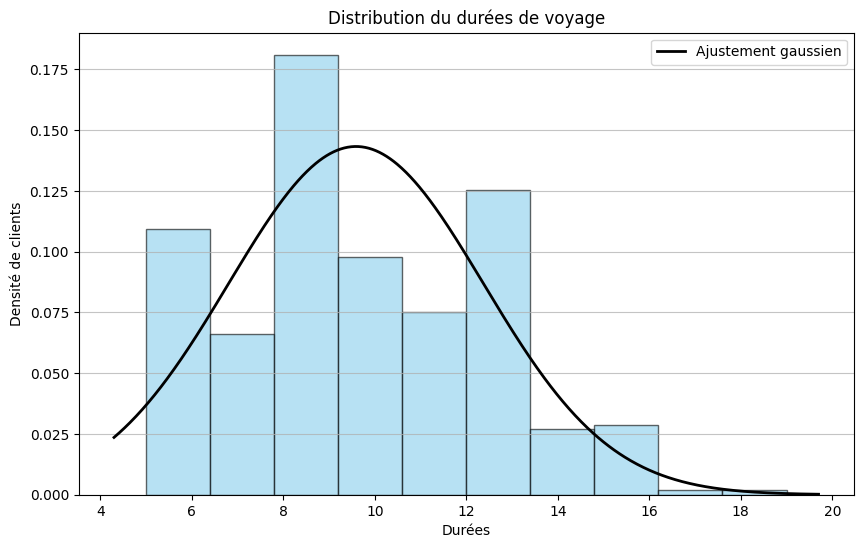

In [3]:
# Extraire la colonne 'budget_voyage_annuel'
durees = data['durée de voyage (en jours)'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(durees, bins=10, density=True, color='skyblue', edgecolor='black', alpha=0.6)

mu, std = norm.fit(durees)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, len(durees))
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")

plt.legend()

plt.title('Distribution du durées de voyage')
plt.xlabel('Durées')
plt.ylabel('Densité de clients')
plt.grid(axis='y', alpha=0.75)

# Test de normalité

In [4]:
from scipy.stats import shapiro

# Effectuer le test de Shapiro-Wilk
stat, p_value = shapiro(durees)

# Afficher les résultats
print("Taille de mon échantillon:", len(durees))
print(f"Statistique du test de Shapiro-Wilk : {stat}")
print(f"Valeur p : {p_value}")

# Interprétation des résultats
alpha = 0.05
if p_value > alpha:
    print("Les données suivent une distribution normale (on ne rejette pas H0)")
else:
    print("Les données ne suivent pas une distribution normale (on rejette H0)")

Taille de mon échantillon: 797
Statistique du test de Shapiro-Wilk : 0.971776700010306
Valeur p : 2.7485416171018823e-11
Les données ne suivent pas une distribution normale (on rejette H0)
